In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from function import PiecewiseFunction
from network import TreeNode
import numpy as np
import matplotlib.pyplot as plt

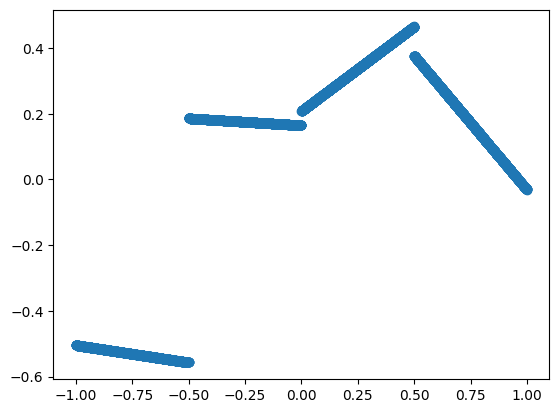

In [3]:
piecewise_func = PiecewiseFunction(lower_bound=-1, upper_bound=1, num_splits=4)

# Sample dataset
inputs = np.random.uniform(-1, 1, 10000)
outputs = np.array([piecewise_func(x) for x in inputs])

# Plot the dataset
plt.scatter(inputs, outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader

# simple dataset given inputs and outputs
class SimpleDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # convert to float32 and torch tensor
        return np.array([self.inputs[idx]]).astype(np.float32), np.array([self.outputs[idx]]).astype(np.float32)


In [5]:
dims = [1, 10, 10, 1]
temperature = 0.5

model = TreeNode(dims, temperature=temperature)
train_dataset = SimpleDataset(inputs, outputs)

In [6]:
from torch.optim import Adam
from torch.nn import MSELoss

# simple training loop
epochs = 20
batch_size = 64
lr = 1e-4
optimizer = Adam(model.parameters(), lr=lr)
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loss_fn = MSELoss()
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # loss = loss_fn(model(x), y)
        loss = model.expected_loss(x, x.clone(), y, loss_fn).mean()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss.item()}")




Epoch 0, Loss 0.12265735864639282
Epoch 1, Loss 0.04059199243783951
Epoch 2, Loss 0.010912987403571606
Epoch 3, Loss 0.008232940919697285
Epoch 4, Loss 0.005843171384185553
Epoch 5, Loss 0.0016699841944500804
Epoch 6, Loss 0.0030540626030415297
Epoch 7, Loss 0.0037111539859324694
Epoch 8, Loss 0.004767716396600008
Epoch 9, Loss 0.005273164715617895
Epoch 10, Loss 0.003442082554101944
Epoch 11, Loss 0.003247327171266079
Epoch 12, Loss 0.0034963428042829037
Epoch 13, Loss 0.0024447059258818626
Epoch 14, Loss 0.0011073696659877896
Epoch 15, Loss 0.0011088786413893104
Epoch 16, Loss 0.0029308057855814695
Epoch 17, Loss 0.0007803539629094303
Epoch 18, Loss 0.0025931622367352247
Epoch 19, Loss 0.0016436624573543668


In [ ]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 100)
model.eval()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    # y, label = model(torch.tensor([[x]]).float())
    x_tensor = torch.tensor([[x]]).float()
    y, label = model.inference(x_tensor, x_tensor.clone())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()

TypeError: TreeNode.inference() missing 1 required positional argument: 'x_og'

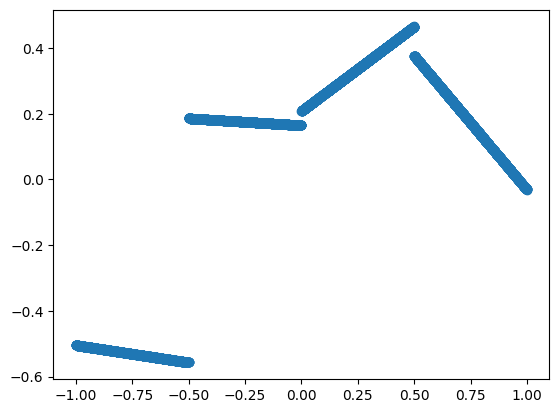

In [8]:
# Plot the dataset
plt.scatter(inputs, outputs)
plt.show()

{'LR': 0}


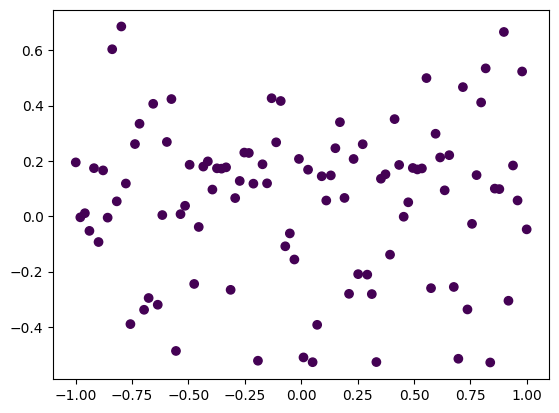

In [9]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 100)
model.train()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    y = model(torch.tensor([[x]]).float())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()